# Set of Example/Test Codes to Evaluate Functions

**Author:** S. Sarkar

**Version:** 0.00

**Release:** Aug/2025

---

# Import Required Libraries 

**Keras Tenforflow**

**SciPy**: Gaussian KDE Using SciPy API (For validation)

**NumPy**: Python package for N-dimensional arrays (Used For SciPiKDE)

### For Plots

**Matplotlib**: Python plotting library


In [1]:
import sys
import os

import tensorflow as tf
import numpy as np
from scipy.stats import gaussian_kde
# -----------------------------------------------------------------------------
import matplotlib.pyplot as plt
print(sys.version)


3.8.12 | packaged by conda-forge | (default, Sep 29 2021, 19:21:23) 
[Clang 11.1.0 ]


# Import Library Functions

## DensityEstimate

### SciPyKDE(X, bandwidth=None, s=None, Points)

This function estimates the probability density function of a 1D dataset using SciPy’s Gaussian KDE with an adaptive bandwidth based on Silverman’s rule. It is build on NumPy and returns the evaluation points alongside the corresponding density values.

### KDE( X,  Bandwidth=None, s=None, Points ):

This function computes the kernel density estimate (KDE) of a 1D dataset using only TensorFlow and Keras operations, with a Gaussian kernel and adaptive bandwidth based on Silverman’s rule. It returns the estimated probability density over specified points efficiently within the TensorFlow graph.

### HDE(S, nBins=None, Epsilon=1e-6):

This function computes a normalized histogram density estimate for 1D data using only TensorFlow and Keras operations. It automatically selects the number of bins using the Freedman-Diaconis rule if not provided. It returns the bin centers, estimated density values, and bin width.

---



## ProbabilityDensityFunction

### `GaussianPDF`

| **Argument Name** | **Default** | **Comments**                                              |
|------------------|-------------|------------------------------------------------------------|
| `x`              | —           | Input values (array or tensor)                             |
| `mu`             | —           | Mean (location parameter)                                  |
| `sigma`          | —           | Standard deviation (scale parameter), \( \sigma > 0 \)     |
| `alpha`          | —           | Skewness parameter (shape)                                 |
| **Return**       | —           | PDF values evaluated at \( x \)                            |

---

### `InvTransformSampling`

| **Argument Name** | **Default** | **Comments**                                             |
|------------------|-------------|-----------------------------------------------------------|
| `pdf`            | —           | Probability density function values (array)               |
| `x`              | —           | Corresponding x-values (array)                            |
| `N`              | —           | Number of samples to generate (integer)                   |
| `Seed`           | None        | Optional random seed for reproducibility                  |
| **Return**       | —           | Samples drawn from the distribution defined by pdf and  x |

---

### `M_Wright`

| **Argument Name** | **Default** | **Comments**                                         |
|------------------|-------------|------------------------------------------------------|
| `x`              | —           | Input array \( x \geq 0 \)                           |
| `v`              | —           | Parameter \( 0 < v < 1 \)                            |
| `J`              | 50          | Number of series terms (integer)                     |
| `SafeCheck`      | True        | Replace NaNs/Infs with 0 (bool)                      |
| `Print`          | False       | Print debug info (bool)                              |
| **Return**       | —           |  M_v(x) computed via truncated series expansion |

---

### `M_Wright_Reflect`

| **Argument Name** | **Default** | **Comments**                                 |
|------------------|-------------|----------------------------------------------|
| `x`              | —           | Non-negative input array or scalar           |
| `v`              | —           | Parameter \( 0 < v < 1 \)                    |
| `J`              | 50          | Number of series terms (integer)             |
| `SafeCheck`      | True        | Replace NaNs/Infs with 0 (bool)              |
| `Print`          | False       | Print debug info (bool)                      |
| **Return**       | —           | M_v(x) using reflection formula for stability |

---

### `M_CDF`

| **Argument Name** | **Default** | **Comments**                                               |
|------------------|-------------|-------------------------------------------------------------|
| `y`              | —           | Input values at which to compute the CDF (array-like)       |
| `v`              | —           | Parameter of the M-Wright function, \( 0 < v < 1 \)         |
| `J`              | 50          | Number of terms in the series expansion (integer)           |
| **Return**       | —           | CDF values corresponding to input \( y \)                   |

---

### `Create_AWM_I_PDF`

| **Argument Name** | **Default** | **Comments**                                          |
|------------------|-------------|--------------------------------------------------------|
| `x`              | —           | Input values at which to compute the PDF (array-like)  |
| `v`              | —           | Parameter of the M-Wright function, \( 0 < v < 1 \)    |
| `lamda`          | —           | Scaling parameter applied to \( x \)                   |
| `J`              | 50          | Number of terms in the series expansion (integer)      |
| **Return**       | —           | PDF values evaluated at \( x \)                        |


---

### `Create_AWM_II_PDF`

| **Argument Name** | **Default** | **Comments**                                                |
|------------------|-------------|--------------------------------------------------------------|
| `x`              | —           | Input values (array-like or scalar)                          |
| `v`              | —           | Fractional parameter \( 0 $\leq$ v < 1 \)                    |
| `alpha`          | —           | Asymmetry parameter \( $\alpha$ > 0 \)                       |
| `J`              | 50          | Number of series terms in `M_Wright_Reflect`                 |
| **Return**       | —           | PDF values \( $f_v$(x; $\alpha$) \), same shape as \( x \)   |

---

### `AsymLaplacePDF`

| **Argument Name** | **Default** | **Comments**                                              |
|------------------|-------------|------------------------------------------------------------|
| `x`              | —           | Points at which to evaluate the PDF (array-like)           |
| `m`              | —           | Location parameter (mode)                                  |
| `lamda`          | —           | Scale parameter \( $\lambda$ > 0 \)                        |
| `kappa`          | —           | Asymmetry parameter \( $\kappa$ > 0 \)                     |
| **Return**       | —           | PDF values evaluated at \( x \)                            |

---

### `SampleAsymLaplace`

| **Argument Name** | **Default** | **Comments**                                       |
|------------------|-------------|-----------------------------------------------------|
| `m`              | —           | Location parameter (mode)                           |
| `lamda`          | —           | Scale parameter \( $\lambda$ > 0 \)                 |
| `kappa`          | —           | Asymmetry parameter \( $\kappa$ > 0 \)              |
| `size`           | —           | Number of samples to generate (integer)             |
| `Seed`           | None        | Optional random seed for reproducibility            |
| **Return**       | —           | Samples from the Asymmetric Laplace distribution    |




## DualPolyRegPDF

$$
\begin{aligned}
\textbf{RetFunc}\ (\\
                &x,                   &&\text{# Input tensor (W),(B, W) or (B, C, W)}\\
                &\text{Order},        &&\text{# Polynomial order (integer)}\\
                &\text{xMid},         &&\text{# Boundary point separating left and right intervals}\\
                &\text{CoefLeft},     &&\text{# Polynomial coefficients for left interval - compatible with Order}\\
                &\text{CoefRight},    &&\text{# Polynomial coefficients for Right interval - compatible with Order}\\
                &\text{xMin},         &&\text{# Minimum bound value for input x}\\
                &\text{xMax},         &&\text{# Maximum bound value for input x}\\
                &\text{MinProb}=1e{-}12, &&\text{# Minimum Clipping bound value for output probabilities}\\
                &\text{MaxProb}=1,    &&\text{# Maximum Clipping bound value for output probabilities}\\
                &\text{Auc}=1         &&\text{# Normalization constant (Integration PDF - Population)}\\
               )
\end{aligned}
$$

This function maps input tensor `x` to a probability tensor using dual piecewise polynomial functions defined over [xMin, xMid] and [xMid, xMax], with coefficients `CoefLeft` and `CoefRight`, respectively.

---

$$
\begin{aligned}
\textbf{Get_xTreshold}\ (\\
                            &x,                     &&\text{# 1D input array of x-values}\\
                            &y,                     &&\text{# 1D input array of y-values}\\
                            &xEdge                  &&\text{# x Coordinate @ Edge}\\
                            &\text{ThFactor}=0.005, &&\text{# Scaling factor for gradient threshold}\\
                            &\text{Up=False}        &&\text{# If True: Upward Slope | Else: Downward Slope}\\
                        ):
\end{aligned}
$$

Detects the x-value where the slope of y vs. x changes rapidly, checking the first half for upward changes 
and the second half for downward changes based on a gradient threshold scaled by ThFactor.

---

$$
\begin{aligned}
\textbf{DualPolyRegPDF}\ (\\
                  &\text{Superset},       &&\text{# Input tensor (Dataset)}\\
                  &\text{Points},         &&\text{# Number of evaluation points for KDE/HDE}\\
                  &\text{PolyOrder},      &&\text{# Polynomial order for curve fitting}\\ 
                  &\text{xMin=None},      &&\text{# Valid Lower bound - Optional}\\  
                  &\text{xMax=None},      &&\text{# Valid Upper bound - Optional}\\  
                  &\text{TimesStd=5},     &&\text{# Range in units of std. deviation for trimming}\\  
                  &\text{ThFactor=0.005}, &&\text{# Scaling factor for gradient threshold detection}\\
                  &\text{UseKDE=True},    &&\text{# If True, use KDE else HDE}\\
                  &\text{fSizeMin=3},     &&\text{# Min. Filter Size for HDE (Gaussian Filter)}\\
                  &\text{fSigma=2.5},     &&\text{# Smoothing Para. (h) for HDE (Gaussian Filter)}\\
                  &\text{RetProb=False},  &&\text{# If True, return PDF else callable Func to compute Prob.}\\
                  &\text{USE_MAX_Y=True}, &&\text{# If True, split curve at global max else at midpoint}\\
                  &\text{Print=False}     &&\text{# If True, print debug info.}\\
                         )
\end{aligned}
$$

This function creates a probability density function (PDF) approximation from a given dataset using either Kernel Density Estimation (KDE) or Histogram Density Estimation (HDE) on a trimmed subset of the data $\left(\text{within} \le \pm Th \cdot \sigma \right)$. The resulting PDF is approximated via separate polynomial fits (least squares) on the left and right of the main peak.  

---



In [2]:
# Get the absolute path to the repo root (go one level up from the notebook dir)
Root = os.path.abspath(os.path.join(os.getcwd(), ".."))
LibPath=os.path.join(Root, "estimatePDF")
print(f"Root:{Root}")
print(f"LibPath:{LibPath}")
sys.path.append(Root)
sys.path.append(LibPath)

from estimatePDF import DensityEstimate, ProbabilityDensityFunction, DualPolyRegPDF


Root:/Users/shansarkar/MyTensor/ProbFunc/estimatePDF
LibPath:/Users/shansarkar/MyTensor/ProbFunc/estimatePDF/estimatePDF


# DensityEstimate

## Gaussian KDE Using SciPy API

This function computes a kernel density estimate (KDE) of a 1D dataset using the SciPy library’s implementation (scipy.stats.gaussian_kde). It applies Silverman’s rule to select the bandwidth if none is provided, then evaluates the estimated probability density function over a specified number of points spanning the data range. The function returns both the evaluation points and the corresponding density values.

As the SciPy API functions are built on top of NumPy, we utilized NumPy functions when implementing the SciPyKDE() function

Virtanen, P., Gommers, R., Oliphant, T.E. et al. SciPy 1.0: fundamental algorithms for scientific computing in Python. Nat Methods 17, 261–272 (2020). https://doi.org/10.1038/s41592-019-0686-2


### For Evaluation Purpose - SpiPyKDE Function

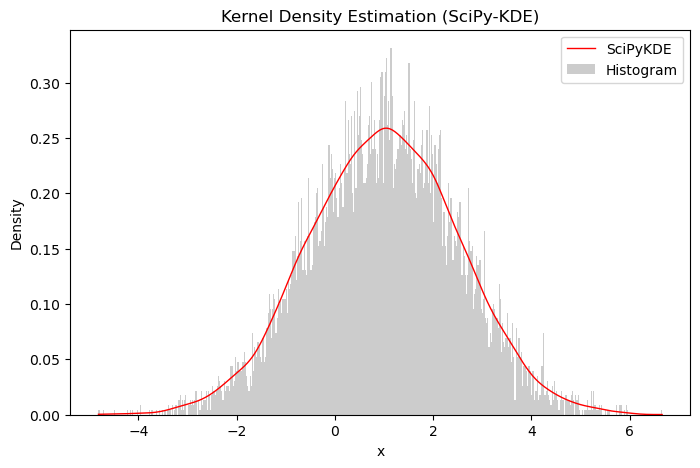

In [3]:
#*************************************************************
# Test Code
#*************************************************************
X_np = np.random.normal(loc=1.0, scale=1.5, size=10000)
x_np, pdf_np = DensityEstimate.SciPyKDE(X_np, Points=1000)
#----------------------------------
# Plot
plt.figure(figsize=(8,5))
plt.plot(x_np, pdf_np, lw=1, c='r', label='SciPyKDE')

plt.hist(X_np, bins=500, density=True, alpha=0.4, color='gray', lw=0.5, label='Histogram')

plt.title('Kernel Density Estimation (SciPy-KDE)')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

## Kernel Density Estimation (KDE) – Gaussian Kernel

Estimate a continuous probability density function (PDF) from a set of samples: $X = \{x_1, x_2, \dots, x_n\}$

### Kernel Density Estimate

The estimated PDF at a point $x$ using kernel density estimation is:

$\hat{f}(x) = \frac{1}{n h} \sum_{i=1}^{n} K\left( \frac{x - x_i}{h} \right)$

Where:
- $n$: Number of samples  
- $h$: Bandwidth (smoothing parameter)  
- $K(u)$: Kernel function (we use Gaussian)

---

### Gaussian Kernel

The Gaussian kernel is defined as:

$K(u) = \frac{1}{\sqrt{2\pi}} \exp\left( -\frac{u^2}{2} \right)$

Substituting into the KDE formula:

$\hat{f}(x) = \frac{1}{n h \sqrt{2\pi}} \sum_{i=1}^{n} \exp\left( -\frac{(x - x_i)^2}{2 h^2} \right)$

---

### Bandwidth Estimation

If the bandwidth $h$ is not provided, we estimate it using **Silverman's rule of thumb**:

$h = 1.06 \cdot \hat{\sigma} \cdot n^{-1/5}$

Where $\hat{\sigma}$ is the standard deviation of the data.

---

### Evaluation Grid

To compute the estimated PDF on a grid:

$z_j \in [\min(X), \max(X)]$, for $j = 1, 2, \dots, M$

with $M$ being the number of points (typically $M = 500$).

---

### Final Estimation on Grid

At each grid point $z_j$, the KDE becomes:

$\hat{f}(z_j) = \frac{1}{n h \sqrt{2\pi}} \sum_{i=1}^{n} \exp\left( -\frac{(z_j - x_i)^2}{2 h^2} \right)$

---

## **Memory Breakdown** for `KDE` Function


| Tensor     | Shape  | Count |
| ---------- | ------ | ----- |
| `X_expand` | (N, 1) | N     |
| `x_expand` | (1, M) | M     |
| `diffSq`   | (N, M) | N×M   |
| `Exp`      | (N, M) | N×M   |
| `kernels`  | (N, M) | N×M   |
| `pdf`      | (M,)   | M     |


#### Total Memory (Worst Case)

$ \text{Total bytes} \approx 12 N M + 4 N + 8 M $

---

#### In Mega Bytes (MB) / Kilo Bytes (KB)

$ \text{Total MB} \approx \frac{12 N M + 4 N + 8 M}{1024^2} $

$\text{Total KB} \approx \frac{12 N M + 4 N + 8 M}{1024} $


Here, 

- $4$: Bytes per `float32`  
- $N$: Number of samples  
- $M$: Number of grid points



### For Evaluation  Purpose - KDE Function

Metal device set to: Apple M1 Max


2025-09-27 06:16:08.507994: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:303] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-27 06:16:08.508013: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:269] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)
2025-09-27 06:16:08.654762: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


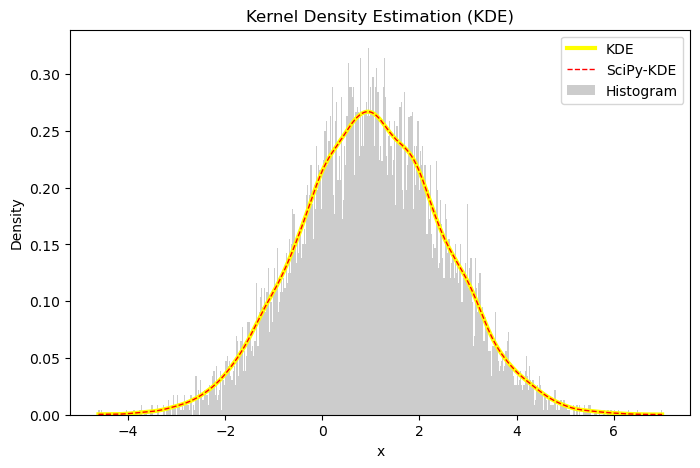

In [4]:
#*************************************************************
# Test Code
#*************************************************************
X_np = np.random.normal(loc=1.0, scale=1.5, size=10000)
# Convert to Tensor
X_tf = tf.constant(X_np, dtype=tf.float32)
# Run KDE
x_vals, pdf_vals = DensityEstimate.KDE(X_tf, Points=1000)
# Convert output tensors to numpy for plotting
x_np = x_vals.numpy()
pdf_np = pdf_vals.numpy()
#----------------------------------
# Use scipy KDE with bandwidth using Silverman's rule
# Bandwidth selection (Silverman's rule if None)
x, pdfSciPy = DensityEstimate.SciPyKDE(X_np, bandwidth=None, Points=500)
#----------------------------------
# Plot
plt.figure(figsize=(8,5))
plt.plot(x_np, pdf_np, lw=3, c='yellow', label='KDE')
plt.plot(x, pdfSciPy, lw=1, ls='--', c='r', label='SciPy-KDE')
plt.hist(X_np, bins=500, density=True, alpha=0.4, color='gray', lw=0.5, label='Histogram')

plt.title('Kernel Density Estimation (KDE)')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()

## Histogram Density Estimation (HDE)

Given a sample set 
$ S = \{ s_1, s_2, \ldots, s_n \} $, we want to estimate the probability density function (PDF) by computing a histogram with bins determined by the Freedman-Diaconis rule.

### Number of bins ($ n_{\text{bins}} $)

if not provided use the Freedman-Diaconis rule, to calculate the optimal number of bins $ n_{\text{bins}} $ based on the sample size and variability in data.

### Bin edges

Define the bin edges as equally spaced points between the minimum and maximum sample values:

$$
\text{edges} = \{ e_0, e_1, \ldots, e_{n_{\text{bins}}} \}, \quad e_0 = \min(S), \quad e_{n_{\text{bins}}} = \max(S)
$$

where

$$
e_i = \min(S) + i \cdot \Delta, \quad \Delta = \frac{\max(S) - \min(S)}{n_{\text{bins}}}
$$

### Histogram counts

For each bin $ i = 1, 2, \ldots, n_{\text{bins}} $, count the number of samples falling into the bin interval $ [e_{i-1}, e_i) $:

$$
c_i = \text{number of samples } s_j \text{ such that } e_{i-1} \leq s_j < e_i
$$

The total number of samples is:

$$
N = \sum_{i=1}^{n_{\text{bins}}} c_i = n
$$

### Bin width

The bin width is:

$$
h = \frac{\max(S) - \min(S)}{n_{\text{bins}}}
$$

### Density estimation

The histogram-based density estimate at bin $ i $ is: $\hat{f}(x_i) = \frac{c_i}{N \cdot h}$

where $ x_i $ is the bin center: $x_i = \frac{e_{i-1} + e_i}{2}$

### Gaussian Filtering for Smoothing

Applied **Gaussian filtering** on the raw histogram density estimate $\hat{f}(x)$ to produce a smoother estimate.

#### Gaussian kernel

Utilized a 1D Normalized Gaussian kernel of size $m$ and Smoothing Parameter $h$ is

$$
g_k = \frac{\exp\left(-\frac{1}{2} \left(\frac{k}{h}\right)^2\right)}{\sum_{j=-\lfloor m/2 \rfloor}^{\lfloor m/2 \rfloor} \exp\left(-\frac{1}{2} \left(\frac{j}{h}\right)^2\right)},  
\quad k \in \left[-\lfloor m/2 \rfloor, \ldots, \lfloor m/2 \rfloor\right]
$$

Here, 

- $\sum_k g_k = 1$ 
- $\text{Kernel size}\ (m)\ = \max\left(f_{\text{min}},\; \left\lfloor 6\sigma \right\rfloor \;\right)$ 
- $f_{\text{min}}\ = 5\ (\text{default})$ 
- $\text{Smoothing Parameter}\ (h) = 2.5 (\text{default})$ 


#### Convolution

The smoothed density is obtained via

$$
\tilde{f}(x_i) = \sum_{k=-\lfloor m/2 \rfloor}^{\lfloor m/2 \rfloor} g_k \cdot \hat{f}(x_{i-k})
$$


---

### Freedman–Diaconis Rule for Histogram Binning

The **Freedman–Diaconis rule** is a robust, data-driven method to determine the optimal bin width for a histogram that approximates the **probability density function (PDF)** of a continuous variable.

**The Freedman–Diaconis rule is:** $h = 2 \cdot \frac{\text{IQR}}{n^{1/3}}$

Here,

- $n$: number of samples  
- $Q_1$: 25th percentile (first quartile)  
- $Q_3$: 75th percentile (third quartile)  
- $\text{IQR} = Q_3 - Q_1$: interquartile range (IQR)  
- $h$: optimal bin width  


#### Number of Bins

Let $\text{Range} = \max(X) - \min(X)$, then the number of bins $k$ is:

$$
k = \left\lceil \frac{\text{Range}}{h} \right\rceil 
= \left\lceil \frac{\max(X) - \min(X)}{2 \cdot \text{IQR} / n^{1/3}} \right\rceil
$$


#### Reference

Freedman, David, and Persi Diaconis. "On the Histogram as a Density Estimator: L2 Theory." Zeitschrift für Wahrscheinlichkeitstheorie und Verwandte Gebiete, vol. 57, no. 4, 1981, pp. 453–476.

---

## **Memory Breakdown** for `HDE` Function

| **Tensor** |  **Shape** |**Count**|     **Description**    |
|:----------:|:----------:|:-------:|:----------------------:|
| S          | ( N, )     | $N$     | Input vector           |
| X\_sorted  | ( N, )     | $N$     | Sorted values          |
| edges      | ( M+1, )   | $M{+}1$ | Bin edges              |
| counts     | ( M, )     | $M$     | Bin counts (int)       |
| centers    | ( M, )     | $M$     | Bin centers            |
| density    | ( M, )     | $M$     | Normalized density     |
| x          | ( 1, M, 1 )| $M$     | Reshaped density       |
| kernel     | ( S, 1, 1 )| $S$     | Gaussian Kernel (S<<M) |
| xFiltered  | ( 1, M, 1 )| $M$     | Filtered Output        |
| pdf        | ( M, )     | $M$     | Probabilty density     |


#### Total Memory ( Estimation )

$ \text{Total bytes} \approx 4 \cdot (2N + 7M) $

Ignored $S\ ( Kernel\ size)$ and and approximated $M+1\approx M$

---

#### In Mega Bytes (MB) / Kilo Bytes (KB)

$ \text{Total MB} \approx \frac{4 \cdot (2N + 7M)}{1024^2} $

$\text{Total KB} \approx \frac{4 \cdot (2N + 7M)}{1024} $


Here, 

- $4$: Bytes per `float32`  
- $N$: Number of samples  
- $M$: Number of grid points


## For Evaluation Purpose - HDE Function

2025-09-27 06:16:09.350672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


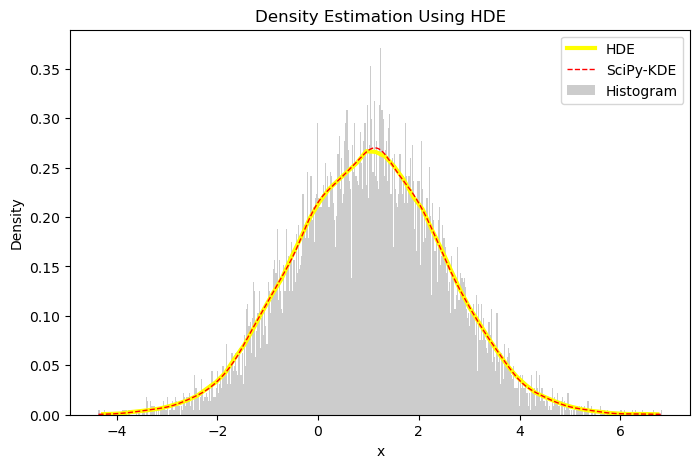

In [5]:
#*************************************************************
# Test Code
#*************************************************************
X_np = np.random.normal(loc=1.0, scale=1.5, size=10000)
# Convert to Tensor
X_tf = tf.constant(X_np, dtype=tf.float32)
# Run histogram density estimation with print enabled
x_vals, pdf_vals, bin_width = DensityEstimate.HDE(X_tf)    
# Convert output tensors to numpy for plotting
x_np = x_vals.numpy()
pdf_np = pdf_vals.numpy()
#----------------------------------
# Use scipy KDE with bandwidth using Silverman's rule
# Bandwidth selection (Silverman's rule if None)
x, pdfSciPy = DensityEstimate.SciPyKDE(X_np, bandwidth=None, Points=500)
#----------------------------------
# Plot
plt.figure(figsize=(8,5))
plt.plot(x_np, pdf_np, lw=3, c='yellow', label='HDE')
plt.plot(x, pdfSciPy, lw=1, ls='--', c='r', label='SciPy-KDE')
plt.hist(X_np, bins=500, density=True, alpha=0.4, color='gray', lw=0.5, label='Histogram')

plt.title('Density Estimation Using HDE')
plt.xlabel('x')
plt.ylabel('Density')
plt.legend()
plt.show()


# ProbabilityDensityFunction

## Symmetric / Asymmetric  -Guassian Distribution 
**with Mean $\mu$ and Standard Deviation $\sigma$**

$f(x; \mu, \sigma, \alpha) = \frac{2}{\sigma} \, \phi(z) \, \Phi(\alpha z)$

$\phi(z) = \frac{1}{\sqrt{2\pi}} \exp\left(-\frac{z^2}{2}\right)$

$\Phi(\alpha z) = \frac{1}{\sqrt{2\pi}} \int_{-\infty}^{\alpha z} \exp\left(-\frac{t^2}{2}\right) \, dt$

Where:
- $z = \frac{x - \mu}{\sigma}$
- $\phi(z)$ is the standard normal PDF  
- $\Phi(z)$ is the standard normal CDF  
- $\mu$: mean 
- $\sigma$: standard deviation 
- $\alpha$: skewness parameter  
    - $\alpha = 0$: symmetric (normal)  
    - $\alpha > 0$: right-skewed  
    - $\alpha < 0$: left-skewed

**PDF of Skew-Guassian Distribution with Mean $\mu$ and Standard Deviation $\sigma$**
$$
\int_{-\infty}^{\infty} f(x; \mu, \sigma, \alpha) \, dx = 1
$$

**Case 1:** Symmetric (Normal) - $\alpha = 0$ | $\mu = 0$ | $\sigma = \sqrt{V}, \quad \text{where } V \sim \mathcal{U}(1, 5)$ |

**Case 2:** Right-skewed - $\alpha \sim \mathcal{U}(1, 5)$ (i.e., $\alpha > 0$) | $\mu = 0$ | $\sigma = \sqrt{V}, \quad \text{where } V \sim \mathcal{U}(1, 5)$ |

**Case 3:** Left-skewed - $\alpha \sim -\mathcal{U}(1, 5)$ (i.e., $\alpha < 0$) | $\mu = 0$ | $\sigma = \sqrt{V}, \quad \text{where } V \sim \mathcal{U}(1, 5)$ |


## For Evaluation Purpose - GaussianPDF

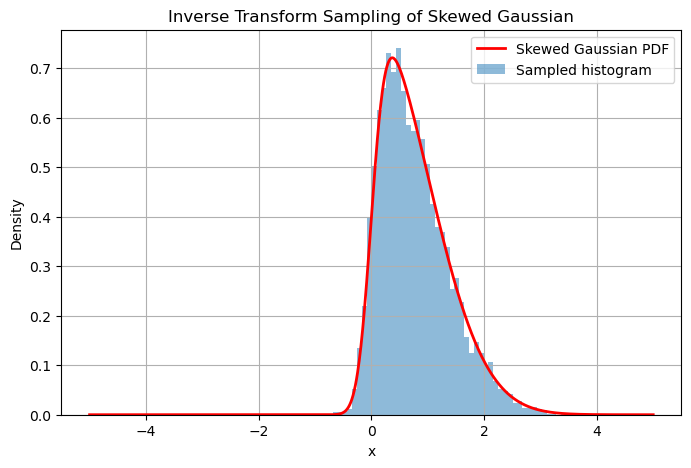

In [6]:
#*************************************************************
# Test Code
#*************************************************************
# Parameters
mu = 0
sigma = 1
alpha = 5
x = np.linspace(-5, 5, 1000)
N_samples = 5000
seed = 42

# Compute PDF
pdf = ProbabilityDensityFunction.GaussianPDF(x, mu, sigma, alpha)

# Generate samples
samples = ProbabilityDensityFunction.InvTransformSampling(pdf, x, N_samples, Seed=seed)

# Plot PDF
plt.figure(figsize=(8,5))
plt.plot(x, pdf, 'r', lw=2, label='Skewed Gaussian PDF')

# Plot histogram of samples
plt.hist(samples, bins=50, density=True, alpha=0.5, label='Sampled histogram')

plt.title("Inverse Transform Sampling of Skewed Gaussian")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.show()

## Test Code to Evaluate M_Wright( ) &  M_Wright_Reflect( )

M_Wright(): NaN / Inf
x: (100,)
Term: (100,)
M: (100,)
Number of NaN values in mw_x: 50

x: (100,)
coeff: (100,)
M: (100,)
Number of NaN values in mwR_x: 0



/Users/shansarkar/MyTensor/ProbFunc/estimatePDF/estimatePDF/ProbabilityDensityFunction.py:368: RuntimeWarning: overflow encountered in power
  Term = ((-x) ** j) / denom
/Users/shansarkar/MyTensor/ProbFunc/estimatePDF/estimatePDF/ProbabilityDensityFunction.py:369: RuntimeWarning: invalid value encountered in add
  M += Term


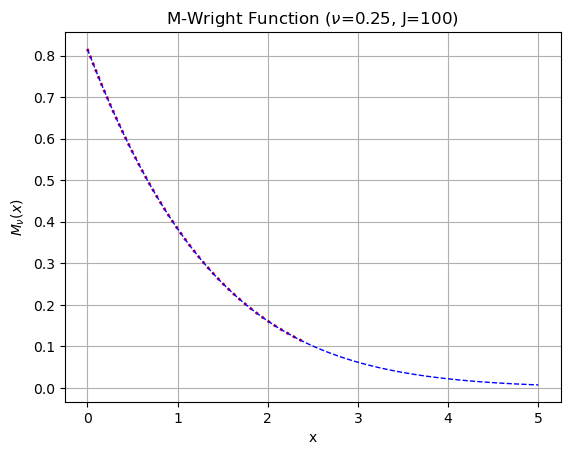

In [7]:
v = 0.25
J=100
x = np.linspace(0, 5, 100)
mw_x = ProbabilityDensityFunction.M_Wright(x, v, J, SafeCheck=False, Print=True)
nan_count = np.sum(np.isnan(mw_x))
print(f'Number of NaN values in mw_x: {nan_count}\n')   

mwR_x = ProbabilityDensityFunction.M_Wright_Reflect(x, v, J, SafeCheck=False, Print=True)
nan_count = np.sum(np.isnan(mwR_x))
print(f'Number of NaN values in mwR_x: {nan_count}\n')
# Plot
plt.plot(x, mw_x, c='r', ls=':', lw=2)
plt.plot(x, mwR_x, c='b',ls='--', lw=1)
plt.title(f'M-Wright Function ($\\nu$={v}, J={J})')
plt.xlabel('x')
plt.ylabel(f'$M_\\nu(x)$')
plt.grid(True)
plt.show()


### Asymmetric M-Wright Type I Distribution: $\mathrm{AWM}_\nu^{I}(\lambda)$

A random variable $X$ follows the **Asymmetric M-Wright Type I distribution** if its probability density function is given by:

$$
f_\nu(x; \lambda) = M_\nu(|x|) \cdot \mathfrak{M}_\nu(\lambda x), \quad 0 \leq \nu < 1
$$

Here,

- $M_\nu(|x|)$: This is the M-Wright function, which acts as a PDF kernel centered at zero. It is non-negative, integrable, and has exponential-type decay.

- $\mathfrak{M}_\nu(\lambda x)$: This is the cumulative distribution function (CDF) associated with the symmetric M-Wright PDF.

$$
\mathfrak{M}_\nu(y) = \frac{1}{2} \left[ 1 + \operatorname{sgn}(y) \left( 1 - \sum_{j=0}^\infty \frac{(-|y|)^j}{j! \, \Gamma(1 - \nu j)} \right) \right]
$$


This form introduces asymmetry by modulating the symmetric PDF $M_\nu(|x|)$ with its CDF $\mathfrak{M}_\nu(\lambda x)$. The parameter $\lambda$ governs the asymmetry and skewness.



## Test Code to Evaluate Func. M_CDF( ) & Create_AWM_I_PDF( )

#### Utilizing Func M_Wright_Reflect( )

Number of NaN values in Mw_xLamda: 0
Number of NaN values in Mv_xLamda: 0
Number of NaN values in Mv_xAbs: 0
Number of NaN values in pdf: 0
PDF AUC: 1.000


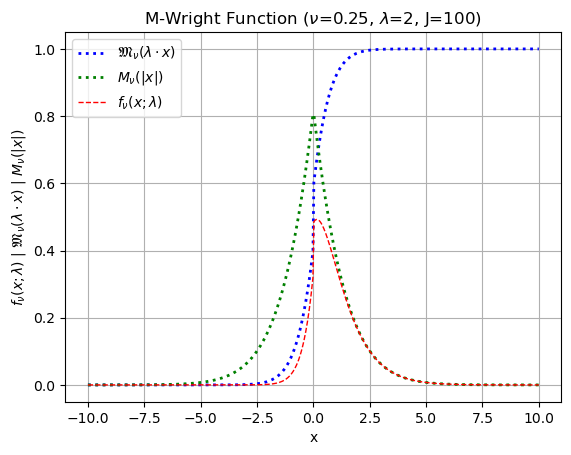

In [8]:
# Test
v = 0.25
J=100
Lamda=2#-0.5
x = np.linspace(-10, +10, 500)
y=Lamda*x
M_cdf = ProbabilityDensityFunction.M_CDF(y, v, J)#, Print=True)
nan_count = np.sum(np.isnan(M_cdf))
print(f'Number of NaN values in Mw_xLamda: {nan_count}')

Mv_xLamda = ProbabilityDensityFunction.M_Wright_Reflect(y, v, J)
nan_count = np.sum(np.isnan(Mv_xLamda))
print(f'Number of NaN values in Mv_xLamda: {nan_count}')    

Mv_xAbs = ProbabilityDensityFunction.M_Wright_Reflect(np.abs(x), v, J)
nan_count = np.sum(np.isnan(Mv_xAbs))
print(f'Number of NaN values in Mv_xAbs: {nan_count}')

pdf = ProbabilityDensityFunction.Create_AWM_I_PDF(x, v, Lamda, J)
nan_count = np.sum(np.isnan(pdf))
print(f'Number of NaN values in pdf: {nan_count}')  
print(f"PDF AUC: {np.trapz(pdf, x):.3f}") #TensorAUC(x, pdf)
# Plot
plt.plot(x, M_cdf, c='b', ls=':', lw=2, label=r'$\mathfrak{M}_\nu(\lambda \cdot x)$')
#plt.plot(x, Mv_xLamda, c='k', ls=':', lw=2, label=r'$M_\nu(x\lambda)$')
plt.plot(x, Mv_xAbs, c='g', ls=':', lw=2, label=r'$M_\nu(|x|)$')
plt.plot(x, pdf, c='r',ls='--', lw=1, label=r'$f_\nu(x; \lambda)$')
plt.title(f'M-Wright Function ($\\nu$={v}, $\\lambda$={Lamda}, J={J})')
plt.xlabel('x')
plt.ylabel(r'$f_\nu(x; \lambda)$ | $\mathfrak{M}_\nu(\lambda \cdot x)$ | $M_\nu(|x|)$')
plt.legend()
plt.grid(True)
plt.show()



### Asymmetric M-Wright Distribution Type II ( $\mathrm{AMW}_\nu^{\mathrm{II}}(\alpha)$ ) :

A random variable $X$ follows the **Asymmetric M-Wright Type II distribution** if its probability density function is given by:

$$
f_\nu(x; \alpha) =\frac{\alpha}{(1 + \alpha^2)}
\begin{cases}
M_\nu(\alpha x), & \text{if } x \geq 0 \\\\
M_\nu(-\frac{x}{ \alpha}), & \text{if } x < 0
\end{cases}
$$

where:
- $M_\nu(x)$ is the **M-Wright function** (PDF kernel),
- $0 \le \nu < 1$ is the shape parameter,
- $\alpha > 0$ is the asymmetry parameter.



## Test Code to Evaluate Func. Create_AWM_II_PDF( )

#### Utilizing Func M_Wright_Reflect( )

x: (250,)
coeff: (250,)
M: (250,)
Number of NaN values in M_AlphaPosX: 0
x: (250,)
coeff: (250,)
M: (250,)
Number of NaN values in M_AlphaNegX: 0
Number of NaN values in pdf: 0
PDF AUC: 0.995


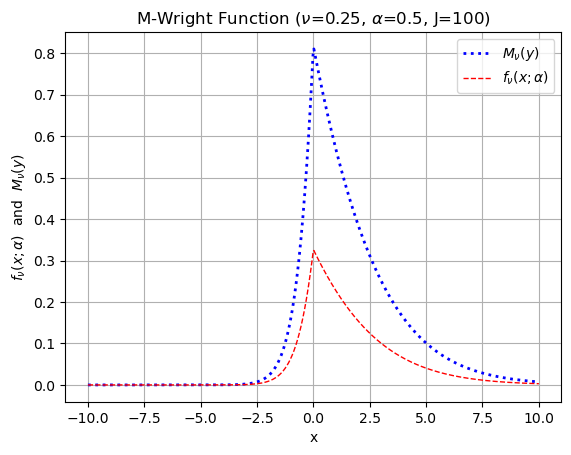

In [9]:
# Test
v = 0.25 # 0 < v < 0.3
J= 100
Alpha=0.5 # 0.3-0.7 or 1.3 - 1.7
x = np.linspace(-10, 10, 500)
xPos = x[np.where(x >= 0)[0]]; y=xPos*Alpha
M_AlphaPosX = ProbabilityDensityFunction.M_Wright_Reflect(y, v, J, SafeCheck=False, Print=True)
nan_count = np.sum(np.isnan(M_AlphaPosX))
print(f'Number of NaN values in M_AlphaPosX: {nan_count}')

xNeg = x[np.where(x < 0)[0]]; y=-xNeg/Alpha
M_AlphaNegX = ProbabilityDensityFunction.M_Wright_Reflect(y, v, J,SafeCheck=False, Print=True)
nan_count = np.sum(np.isnan(M_AlphaNegX))
print(f'Number of NaN values in M_AlphaNegX: {nan_count}')    
M_AlphaAllX = np.concatenate([M_AlphaNegX, M_AlphaPosX])


pdf = ProbabilityDensityFunction.Create_AWM_II_PDF(x, v, Alpha, J)
nan_count = np.sum(np.isnan(pdf))
print(f'Number of NaN values in pdf: {nan_count}') 
print(f"PDF AUC: {np.trapz(pdf, x):.3f}") #TensorAUC(x, pdf)
# Plot
plt.plot(x, M_AlphaAllX, c='b', ls=':', lw=2,label=r'$M_\nu(y)$')
plt.plot(x, pdf, c='r',ls='--', lw=1, label=r'$f_\nu(x; \alpha)$')

plt.title(f'M-Wright Function ($\\nu$={v}, $\\alpha$={Alpha}, J={J})')
plt.xlabel('x')
plt.ylabel(r'$f_\nu(x; \alpha)$  and  $M_\nu(y)$')
plt.legend()
plt.grid(True)
plt.show()


## Asymmetric Laplace PDF

The **Asymmetric Laplace Distribution (ALD)** is a continuous distribution extending the classic Laplace by allowing different decay rates on each side of its central location. Here’s the mathematical form:

\\[
X \sim \text{AL}(m, \lambda, \kappa),
\\]  
where:

- \( $m$ \): location parameter  
- \( $\lambda > 0 $\): scale  
- \( $\kappa > 0 $\): asymmetry factor

The **probability density function (PDF)** is:

\\[
f(x \mid m, \lambda, \kappa) =
\frac{\lambda}{\kappa + \frac{1}{\kappa}}
\begin{cases}
\exp\left( -\frac{\lambda}{\kappa}(|x - m|) \right), & x < m \\\\
\exp\left( -\lambda \kappa (|x - m|) \right), & x \ge m
\end{cases}
\\]

When \( $\kappa = 1 $\), this reduces to the symmetric Laplace distribution.

## Inverse Transform Sampling for the Asymmetric Laplace Distribution

### Algorithm:

Define \( p \), the split probability between left and right tails: $ p = \frac{\kappa^2}{1 + \kappa^2} $

\( p \) is a probability value that splits the distribution into two parts (left and right tails)

---

Generate uniform random values: $ u \sim \text{Uniform}(0, 1)$

---

Apply inverse CDF sampling piecewise:

- If $u < p$ → Left tail, solve for $x$ from: $u = p \cdot \exp\left(\lambda \kappa (x - m)\right)$

Rearranged to isolate \( x \): $x = m + \frac{\kappa}{\lambda} \ln\left(\frac{u}{p}\right)$

---
- If $u \ge p$ → Right tail, solve for $x$ from: $u = 1-(1-p)\exp\left(-\frac{\lambda}{\kappa} (x - m)\right)$

Rearranged to isolate \( x \): $x = m - \frac{1}{\lambda \kappa} \ln\left(\frac{1-u}{1-p}\right)$

Kotz, S., Kozubowski, T.J., Podgórski, K. (2001). Asymmetric Laplace Distributions. In: The Laplace Distribution and Generalizations. Birkhäuser, Boston, MA. https://doi.org/10.1007/978-1-4612-0173-1_3


## Test Code to Evaluate Func. AsymLaplacePDF() & SampleAsymLaplace( )

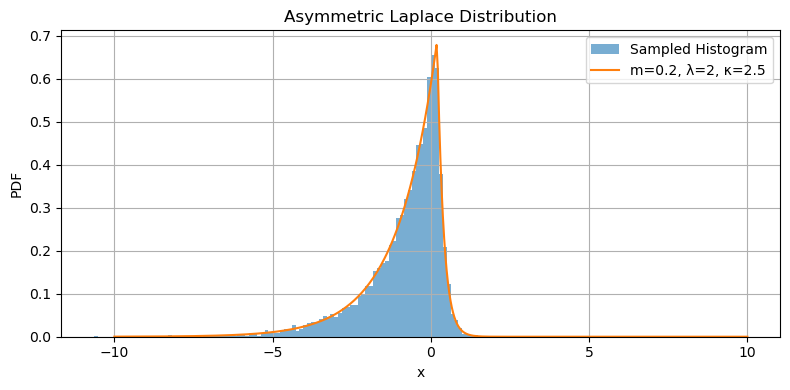

PDF AUC: 0.999


In [10]:
# Parameters for the Asymmetric Laplace Distribution
m = 0.2       # location
lamda = 2 # scale
kappa = 2.5 # asymmetry
N=500

# Generate x values and corresponding PDF values
x_vals = np.linspace(-10, 10, N)
pdf_vals = ProbabilityDensityFunction.AsymLaplacePDF(x_vals, m, lamda, kappa)

# Generate the dataset X^
X_hat = ProbabilityDensityFunction.SampleAsymLaplace(m, lamda, kappa, 10000)

# Plot the distribution
plt.figure(figsize=(8, 4))
plt.hist(X_hat, bins=100, density=True, alpha=0.6, label="Sampled Histogram")
plt.plot(x_vals, pdf_vals, label=f"m={m}, λ={lamda}, κ={kappa}")
plt.title("Asymmetric Laplace Distribution")
plt.xlabel("x")
plt.ylabel("PDF")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

print(f"PDF AUC: {np.trapz(pdf_vals, x_vals):.3f}")#TensorAUC(x_vals, pdf_vals):.3f}")

# DualPolyRegPDF

## Test Code - DualPolyRegPDF()


std: 1.481

Case 1: KDE + RetProb=True


2025-09-27 06:16:10.550794: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


AUC (np.trapz(y_fit, x_fit)): 1.0

Case 2: KDE + RetProb=False


2025-09-27 06:16:11.020674: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2025-09-27 06:16:11.093292: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


AUC (np.trapz(y_fit, x_fit)): 0.99971914

Case 3: HDE + RetProb=True
AUC (np.trapz(y_fit, x_fit)): 1.0

Case 4: HDE + RetProb=False
AUC (np.trapz(y_fit, x_fit)): 1.0000788


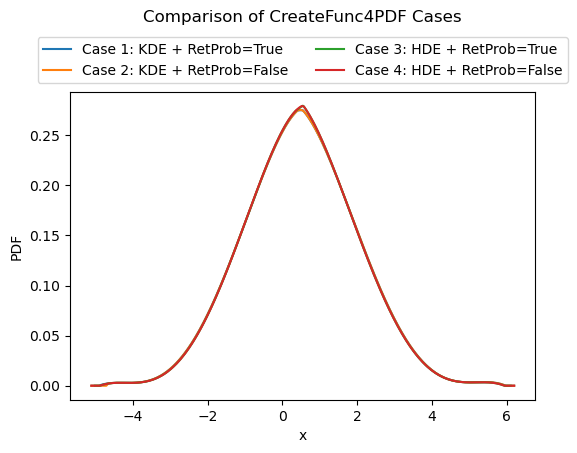

In [11]:
np.random.seed(0)
fig, bx = plt.subplots(1, 1, figsize=(6, 4));
data = np.random.normal(loc=0.5, scale=1.5, size=10000)
print(f'std: {np.std(data):.3f}')
data_tf = tf.constant(data, dtype=tf.float32)

cases = [   {"UseKDE": True,  "RetProb": True,  "label": "Case 1: KDE + RetProb=True"},
            {"UseKDE": True,  "RetProb": False, "label": "Case 2: KDE + RetProb=False"},    
            {"UseKDE": False, "RetProb": True,  "label": "Case 3: HDE + RetProb=True"},
            {"UseKDE": False, "RetProb": False, "label": "Case 4: HDE + RetProb=False"},]

for case in cases:
    print("\n" + "="*80)
    print(case["label"])
    print("="*80)

    result = DualPolyRegPDF.DualPolyRegPDF( Superset=data_tf,
                                            Points=200,
                                            PolyOrder=5,
                                            TimesStd=5,
                                            UseKDE=case["UseKDE"],
                                            RetProb=case["RetProb"],
                                            Print=False)

    if case["RetProb"]:
        # result is (x, y)
        x_fit, y_fit = result
    else:
        # result is a callable function → compute probabilities
        func = result
        x_fit = np.linspace(np.min(data), np.max(data), 200).astype(np.float32)
        yHat = func(tf.constant(x_fit, dtype=tf.float32))
        y_fit =yHat.numpy()

    auc = np.trapz(y_fit, x_fit)
    print("AUC (np.trapz(y_fit, x_fit)):", auc)

    bx.plot(x_fit, y_fit, label=case["label"])

bx.set_title("Comparison of CreateFunc4PDF Cases", y=1.2)
bx.set_xlabel("x")
bx.set_ylabel("PDF")
bx.legend(loc='upper center', ncol=2, bbox_to_anchor=(0.5, 1.2))
plt.show();
